In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [12]:
file_path = 'output'

In [13]:
name_class = os.listdir(file_path)
name_class

['.DS_Store', 'real', 'fake']

In [14]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [15]:
filepaths

['output/real/0026_face_3.png',
 'output/real/0037_face_1.png',
 'output/real/0011_face_3.png',
 'output/real/0000_face_1.png',
 'output/real/0044_face_3.png',
 'output/real/0004_face_10.png',
 'output/real/0019_face_5.png',
 'output/real/0008_face_7.png',
 'output/real/0042_face_8.png',
 'output/real/0023_face_6.png',
 'output/real/0032_face_4.png',
 'output/real/0014_face_6.png',
 'output/real/0005_face_4.png',
 'output/real/0020_face_8.png',
 'output/real/0017_face_8.png',
 'output/real/0041_face_6.png',
 'output/real/0041_face_7.png',
 'output/real/0017_face_9.png',
 'output/real/0020_face_9.png',
 'output/real/0005_face_5.png',
 'output/real/0014_face_7.png',
 'output/real/0032_face_5.png',
 'output/real/0023_face_7.png',
 'output/real/0042_face_9.png',
 'output/real/0008_face_6.png',
 'output/real/0019_face_4.png',
 'output/real/0018_face_10.png',
 'output/real/0044_face_2.png',
 'output/real/0011_face_2.png',
 'output/real/0026_face_2.png',
 'output/real/0037_face_2.png',
 'outp

In [16]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 

In [17]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,output/real/0006_face_7.png,real
1,output/real/0042_face_6.png,real
2,output/fake/0007_fake_face_1.png,fake
3,output/fake/0026_fake_face_6.png,fake
4,output/real/0029_face_10.png,real


In [18]:
#balancing

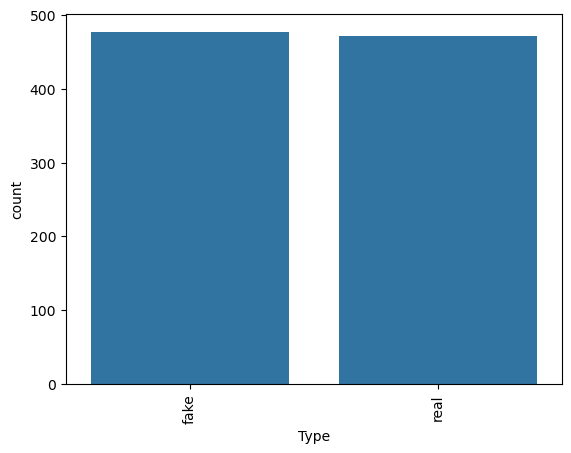

In [19]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [20]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [21]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

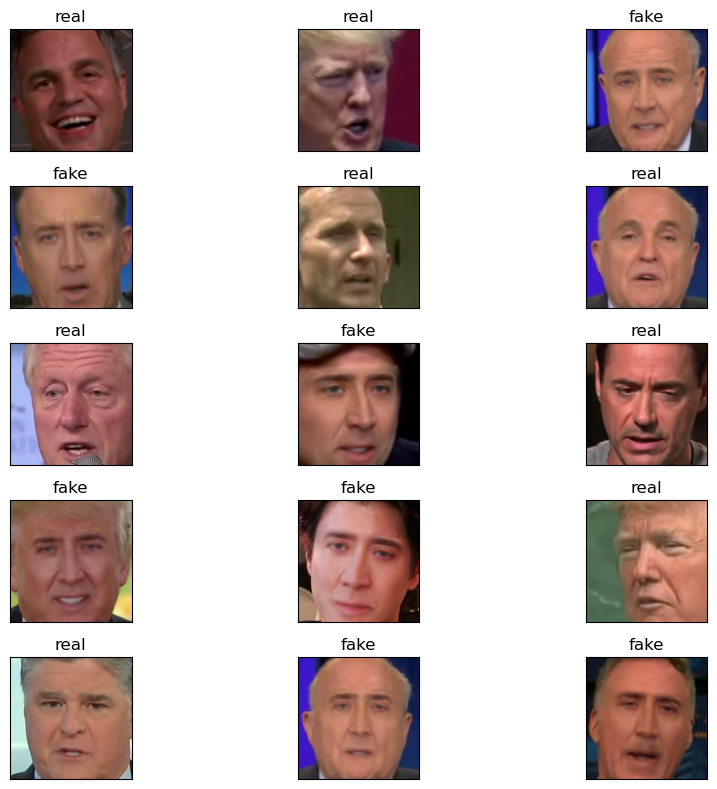

In [22]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [23]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [24]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 711 validated image filenames belonging to 2 classes.
Found 237 validated image filenames belonging to 2 classes.
Found 237 validated image filenames belonging to 2 classes.


In [25]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [26]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [29]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 673ms/step - accuracy: 0.6036 - loss: 0.7558 - val_accuracy: 0.7637 - val_loss: 0.4860
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 795ms/step - accuracy: 0.8274 - loss: 0.3926 - val_accuracy: 0.8397 - val_loss: 0.3706
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 861ms/step - accuracy: 0.8860 - loss: 0.2683 - val_accuracy: 0.8523 - val_loss: 0.3780
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 956ms/step - accuracy: 0.9323 - loss: 0.1733 - val_accuracy: 0.8143 - val_loss: 0.4221
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 981ms/step - accuracy: 0.9287 - loss: 0.1575 - val_accuracy: 0.8692 - val_loss: 0.3441
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 983ms/step - accuracy: 0.9560 - loss: 0.1126 - val_accuracy: 0.8608 - val_loss: 0.3743
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 992ms/step - accuracy: 0.9732 - loss: 0.0768 - val_accuracy: 0.8776 - val_loss: 0.4301
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 969ms/step - accuracy: 0.9670 - loss: 0.1076 - val_accuracy: 0.869

In [30]:
model.save("model_resnet50.h5")  

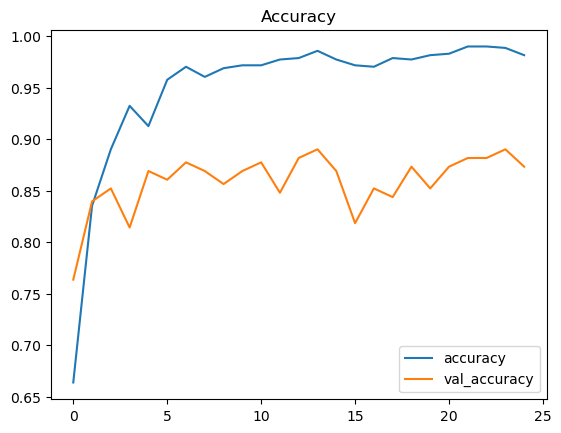

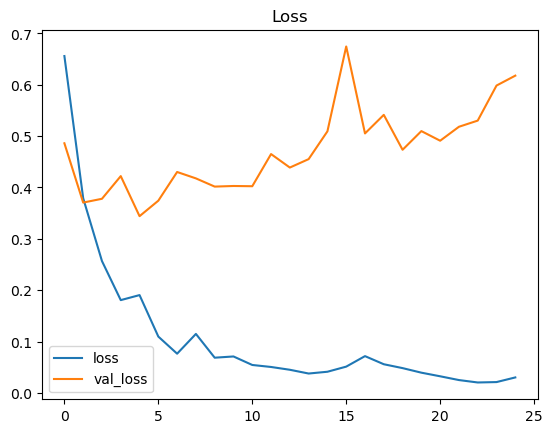

In [31]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [32]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


    Test Loss: 0.61765
Test Accuracy: 87.34%


In [33]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 872ms/step


In [34]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        fake       0.96      0.81      0.88       134
        real       0.80      0.95      0.87       103

    accuracy                           0.87       237
   macro avg       0.88      0.88      0.87       237
weighted avg       0.89      0.87      0.87       237



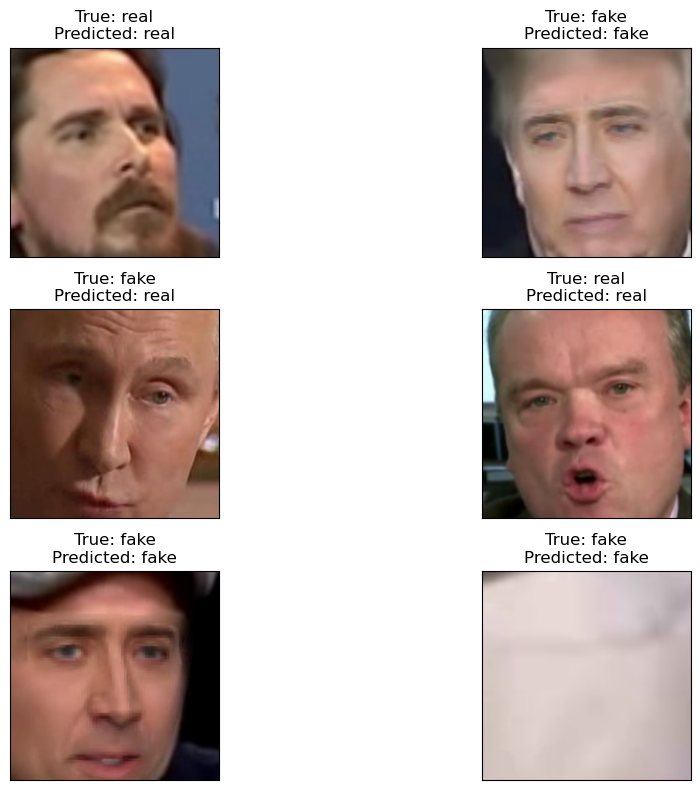

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [36]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/Users/harsha/Desktop/deep_fake_detection_web_app _info_pages/static/q_images/fake/0000_fake_face_1.png'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[100   0]]


In [37]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [38]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/Users/harsha/Desktop/deep_fake_detection_web_app _info_pages/static/q_images/real/0003_face_3.png'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[  0 100]]


In [39]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0, 100]


In [40]:
print("Largest element is:", max(pp))

Largest element is: 100


In [41]:
index = pp.index(max(pp))

In [42]:
name_class=["fake","real"]

In [43]:
name_class[index]

'real'

In [44]:
import matplotlib.pyplot as plt

In [45]:
plt.imread(img_path)

array([[[0.36862746, 0.34901962, 0.35686275],
        [0.3647059 , 0.34509805, 0.3529412 ],
        [0.3647059 , 0.34509805, 0.34509805],
        ...,
        [0.23921569, 0.20784314, 0.23921569],
        [0.2509804 , 0.20784314, 0.2509804 ],
        [0.2509804 , 0.20392157, 0.2509804 ]],

       [[0.3647059 , 0.34509805, 0.3529412 ],
        [0.3647059 , 0.34509805, 0.3529412 ],
        [0.3647059 , 0.34509805, 0.34901962],
        ...,
        [0.22352941, 0.19215687, 0.22352941],
        [0.23137255, 0.1882353 , 0.23137255],
        [0.23137255, 0.18431373, 0.23137255]],

       [[0.3647059 , 0.34509805, 0.3529412 ],
        [0.3647059 , 0.34117648, 0.34901962],
        [0.3647059 , 0.34509805, 0.34509805],
        ...,
        [0.20784314, 0.1764706 , 0.20784314],
        [0.21176471, 0.1764706 , 0.21568628],
        [0.21176471, 0.1764706 , 0.21960784]],

       ...,

       [[0.23921569, 0.20784314, 0.23137255],
        [0.23921569, 0.20784314, 0.23137255],
        [0.23921569, 0

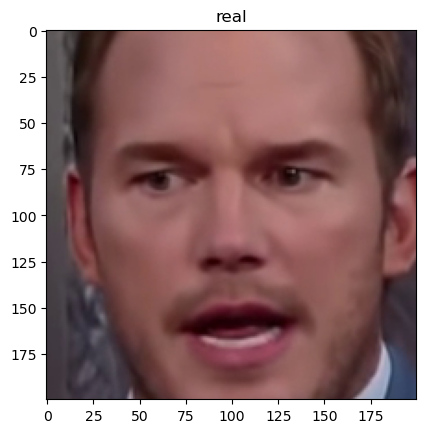

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()

VGG16 and VGG19 implementation

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Load the pre-trained VGG16 model
pretrained_model = VGG16(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [49]:

# Define the input and output layers
inputs = pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dropout(0.5)(x)  # Add regularization to avoid overfitting
x = Dense(128, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)


In [50]:
# Build the final model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5146 - loss: 2.2583 - val_accuracy: 0.6203 - val_loss: 0.9634
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.6577 - loss: 1.0265 - val_accuracy: 0.7595 - val_loss: 0.5993
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.6888 - loss: 0.8278 - val_accuracy: 0.8017 - val_loss: 0.5581
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7565 - loss: 0.6234 - val_accuracy: 0.8143 - val_loss: 0.4710
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7527 - loss: 0.5364 - val_accuracy: 0.8186 - val_loss: 0.5095
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8181 - loss: 0.4253 - val_accuracy: 0.8354 - val_loss: 0.4185
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8225 - loss: 0.4308 - val_accuracy: 0.8439 - val_loss: 0.4459
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8414 - loss: 0.3578 - val_accuracy: 0.8650 - val_loss:

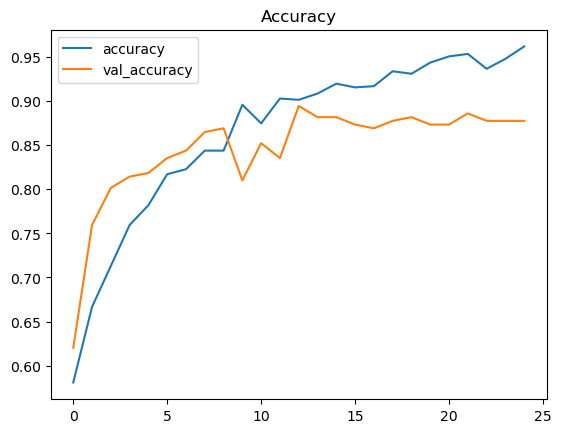

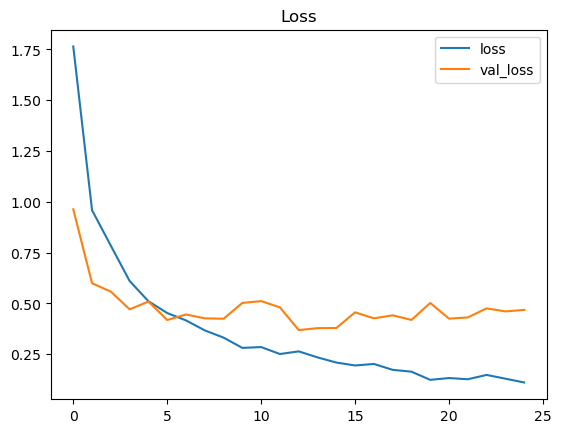

In [51]:
# Plot training and validation accuracy
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

# Plot training and validation loss
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [52]:
# Evaluate the model on test data
results = model.evaluate(test_gen, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


    Test Loss: 0.46831
Test Accuracy: 87.76%


In [58]:
#Predict the labels of the test dataset
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)

# Map the labels back to their original names
labels = (train_gen.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred = [labels[k] for k in pred]


7/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30265de40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


In [59]:

# Get the true labels
y_test = list(test.Label)

# Print the classification report
print(classification_report(y_test, pred))



              precision    recall  f1-score   support

        fake       0.93      0.84      0.89       134
        real       0.82      0.92      0.87       103

    accuracy                           0.88       237
   macro avg       0.88      0.88      0.88       237
weighted avg       0.88      0.88      0.88       237



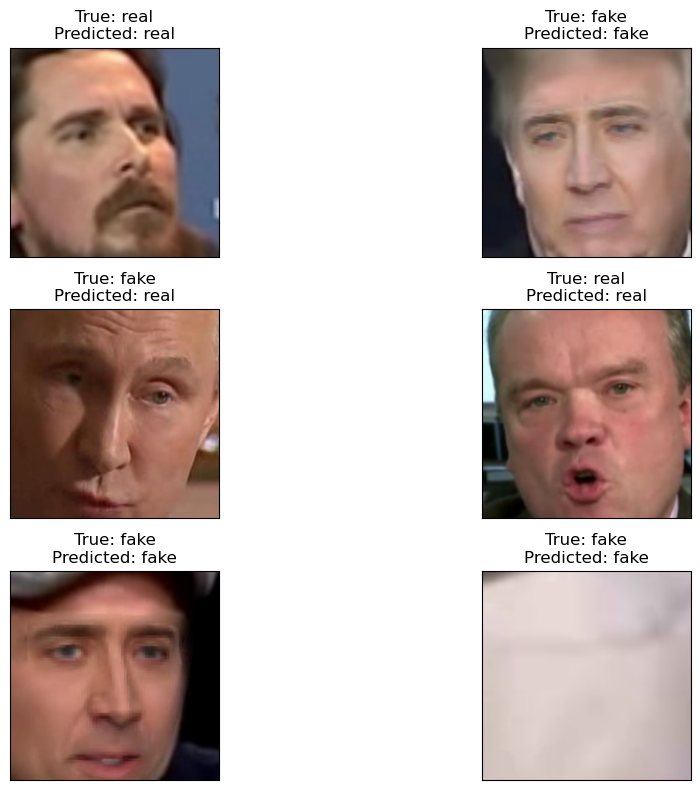

In [60]:
# Visualize the results
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
[[46 53]]


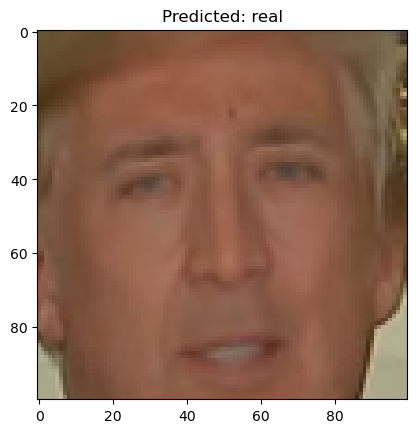

In [65]:
# Test a single image prediction
img_path = '/Users/harsha/Desktop/deep_fake_detection_web_app _info_pages/static/q_images/fake/0000_fake_face_2.png'  # Update the path to your test image

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = x / 255.0  # Normalize the image

result = model.predict(x)
print((result * 100).astype('int'))

# Visualize the image with prediction
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {labels[np.argmax(result)]}")
plt.show()

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Load the pre-trained VGG19 model
pretrained_model = VGG19(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)



In [71]:
# Freeze the layers of the base model
pretrained_model.trainable = False

# Define the input and output layers
inputs = pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dropout(0.5)(x)  # Add regularization to avoid overfitting
x = Dense(128, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)


In [73]:
# Build the final model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5383 - loss: 1.8102 - val_accuracy: 0.7342 - val_loss: 0.6259
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6456 - loss: 1.0406 - val_accuracy: 0.6835 - val_loss: 0.6365
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6432 - loss: 0.8581 - val_accuracy: 0.7553 - val_loss: 0.5774
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7402 - loss: 0.6056 - val_accuracy: 0.7511 - val_loss: 0.5833
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.7788 - loss: 0.5314 - val_accuracy: 0.7342 - val_loss: 0.5609
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8039 - loss: 0.4524 - val_accuracy: 0.7679 - val_loss: 0.4951
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.7875 - loss: 0.5503 - val_accuracy: 0.7806 - val_loss: 0.5312
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8055 - loss: 0.4633 - val_accuracy: 0.7975 - val_loss:

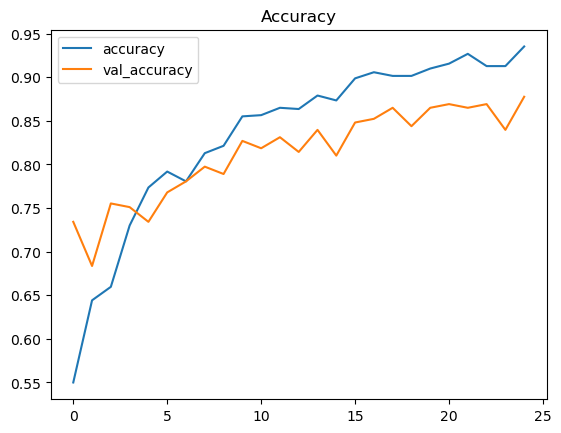

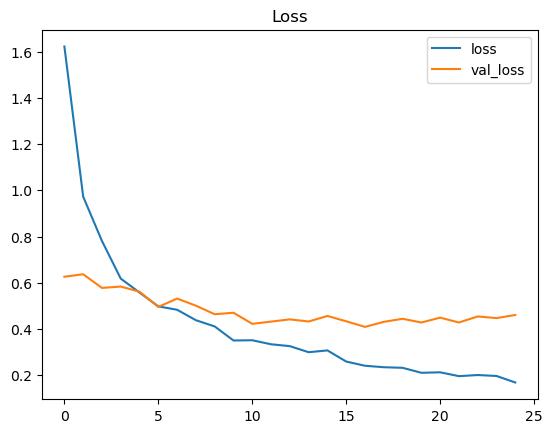

In [74]:
# Plot training and validation accuracy
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

# Plot training and validation loss
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()


In [75]:
# Evaluate the model on test data
results = model.evaluate(test_gen, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

# Predict the labels of the test dataset
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)


    Test Loss: 0.46019
Test Accuracy: 87.76%
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


In [76]:

# Map the labels back to their original names
labels = (train_gen.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred = [labels[k] for k in pred]


In [77]:
# Get the true labels
y_test = list(test.Label)

In [80]:
# Print the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        fake       0.92      0.86      0.89       134
        real       0.83      0.90      0.87       103

    accuracy                           0.88       237
   macro avg       0.88      0.88      0.88       237
weighted avg       0.88      0.88      0.88       237



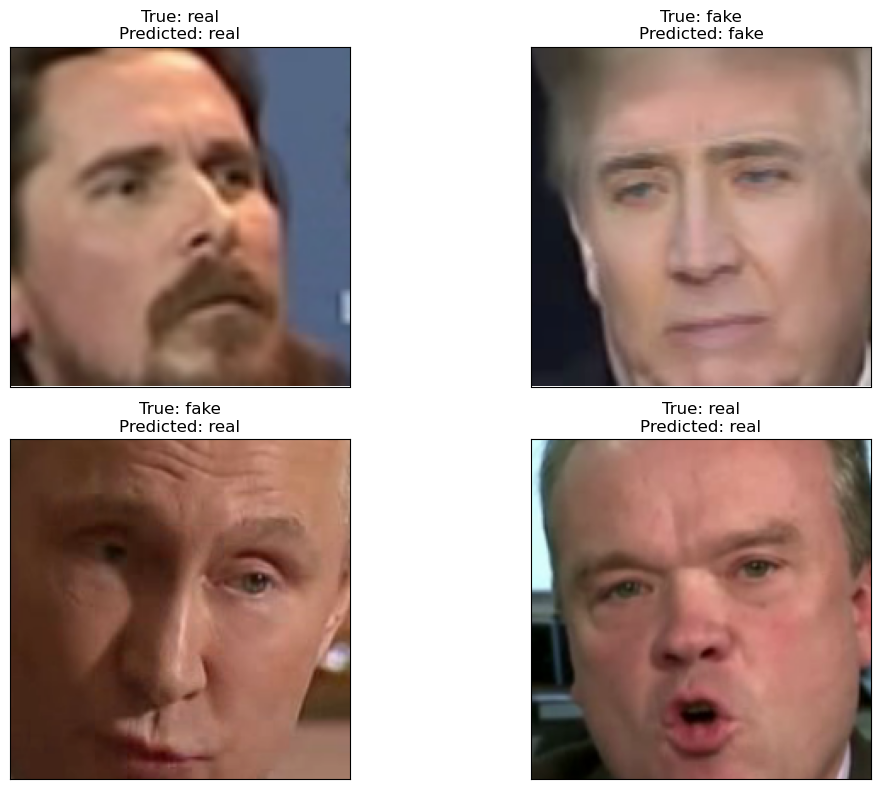

In [98]:
# Visualize the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[11 88]]


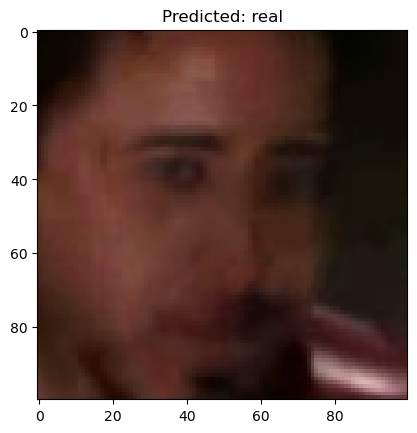

In [100]:
# Test a single image prediction
img_path = '/Users/harsha/Desktop/deep_fake_detection_web_app _info_pages/static/q_images/fake/0005_fake_face_1.png'  # Update the path to your test image

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = x / 255.0  # Normalize the image

result = model.predict(x)
print((result * 100).astype('int'))

# Visualize the image with prediction
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {labels[np.argmax(result)]}")
plt.show()